# 1. Importando bibliotecas e dados para tratamento

In [1]:
import pandas as pd
import math
import numpy as np
from matplotlib import pyplot as plt

Dados = pd.read_excel("C:/Users/lfsou/OneDrive/Documentos/UFLA/2021-2/SANEAMENTO/IAP excel.xlsx")
Dados = (Dados[0:].T)
Dados.columns = (Dados.iloc[0])
Dados = Dados.drop(Dados.index[0:2])
Dados

Amostras,pH,Coliformes,Nitrato,Fosfato,DBO,OD,Cl,ST,Turbidez,ΔT,...,Chumbo,Cromo total,Niquel,Mercúrio,PFTHM,Alumínio,Cobre,Ferro,Manganês,Zinco
1,4.0,10.0,0.5,0.0,20.0,6.8,3.0,30.0,10.0,0.0,...,0.033,0.05,0.025,0.001,430.0,0.2,8.0,0.3,0.4,5.0
2,5.0,100000.0,10.0,2.5,60.0,6.0,20.0,55.0,40.0,0.0,...,0.021,0.051,0.025,0.0011,420.0,0.4,7.0,0.8,0.35,5.1
3,6.0,100.0,1.0,0.5,25.0,6.5,5.0,35.0,15.0,0.0,...,0.018,0.052,0.024,0.0012,410.0,0.6,6.0,1.3,0.3,5.2
4,7.0,1000000.0,15.0,3.5,80.0,5.8,50.0,70.0,50.0,0.0,...,0.015,0.053,0.023,0.0013,400.0,0.8,5.0,1.8,0.25,5.3
5,8.0,1000.0,2.5,0.8,30.0,6.5,10.0,40.0,20.0,0.0,...,0.012,0.054,0.022,0.0014,390.0,1.0,4.0,2.3,0.2,5.4
6,4.0,10000000.0,20.0,5.0,100.0,5.5,80.0,100.0,70.0,0.0,...,0.011,0.055,0.021,0.0015,380.0,1.2,3.0,2.8,0.15,5.5
7,5.0,10000.0,3.0,1.5,35.0,6.3,15.0,45.0,25.0,0.0,...,0.01,0.056,0.02,0.0016,370.0,1.4,2.0,3.3,0.1,5.6


# 2. qi do pH

In [2]:
Dados['qi_pH'] = 0
cont=0
for i in Dados['pH']:
    cont+=1
    if i<= 2:
        Dados.loc[cont, 'qi_pH'] = 2.00
    elif i>2 and i<=6.9:
        Dados.loc[cont, 'qi_pH'] = (-37.1085 + 41.91277 * i - 15.7043 * (i**2) + 2.417486 * (i**3) - 0.091252 * (i**4))
    elif i>6.9 and i<=7.1:
        Dados.loc[cont, 'qi_pH'] = (-4.69365 - 21.4593 * i - 68.4561 * (i**2) + 21.638886 * (i**3) - 1.59165 * (i**4))
    elif i>7.1 and i<=12:
        Dados.loc[cont, 'qi_pH'] = (-7698.19 + 3262.031 * i - 499.494 * (i**2) + 33.1551 * (i**3) - 0.810613 * (i**4))
    else:
        Dados.loc[cont, 'qi_pH'] = 3.00
        
Dados

Amostras,pH,Coliformes,Nitrato,Fosfato,DBO,OD,Cl,ST,Turbidez,ΔT,...,Cromo total,Niquel,Mercúrio,PFTHM,Alumínio,Cobre,Ferro,Manganês,Zinco,qi_pH
1,4.0,10.0,0.5,0.0,20.0,6.8,3.0,30.0,10.0,0.0,...,0.05,0.025,0.001,430.0,0.2,8.0,0.3,0.4,5.0,10.632372
2,5.0,100000.0,10.0,2.5,60.0,6.0,20.0,55.0,40.0,0.0,...,0.051,0.025,0.0011,420.0,0.4,7.0,0.8,0.35,5.1,25.001100
3,6.0,100.0,1.0,0.5,25.0,6.5,5.0,35.0,15.0,0.0,...,0.052,0.024,0.0012,410.0,0.6,6.0,1.3,0.3,5.2,52.927704
4,7.0,1000000.0,15.0,3.5,80.0,5.8,50.0,70.0,50.0,0.0,...,0.053,0.023,0.0013,400.0,0.8,5.0,1.8,0.25,5.3,91.328598
5,8.0,1000.0,2.5,0.8,30.0,6.5,10.0,40.0,20.0,0.0,...,0.054,0.022,0.0014,390.0,1.0,4.0,2.3,0.2,5.4,85.582352
6,4.0,10000000.0,20.0,5.0,100.0,5.5,80.0,100.0,70.0,0.0,...,0.055,0.021,0.0015,380.0,1.2,3.0,2.8,0.15,5.5,10.632372
7,5.0,10000.0,3.0,1.5,35.0,6.3,15.0,45.0,25.0,0.0,...,0.056,0.02,0.0016,370.0,1.4,2.0,3.3,0.1,5.6,25.001100


# 3. qi do CT

In [3]:
Dados['qi_CT'] = 0
cont1=0
for j in Dados['Coliformes']:
    cont1+=1
    if j<= 10000:
        Dados.loc[cont1, 'qi_CT'] = (98.24034 - 34.7145 * (math.log10(j)) + 2.614267 * ((math.log10(j))**2) + 0.107821 * ((math.log10(j))**3))
    else:
        Dados.loc[cont1, 'qi_CT'] = 3

Dados

Amostras,pH,Coliformes,Nitrato,Fosfato,DBO,OD,Cl,ST,Turbidez,ΔT,...,Niquel,Mercúrio,PFTHM,Alumínio,Cobre,Ferro,Manganês,Zinco,qi_pH,qi_CT
1,4.0,10.0,0.5,0.0,20.0,6.8,3.0,30.0,10.0,0.0,...,0.025,0.001,430.0,0.2,8.0,0.3,0.4,5.0,10.632372,66.247928
2,5.0,100000.0,10.0,2.5,60.0,6.0,20.0,55.0,40.0,0.0,...,0.025,0.0011,420.0,0.4,7.0,0.8,0.35,5.1,25.001100,3.000000
3,6.0,100.0,1.0,0.5,25.0,6.5,5.0,35.0,15.0,0.0,...,0.024,0.0012,410.0,0.6,6.0,1.3,0.3,5.2,52.927704,40.130976
4,7.0,1000000.0,15.0,3.5,80.0,5.8,50.0,70.0,50.0,0.0,...,0.023,0.0013,400.0,0.8,5.0,1.8,0.25,5.3,91.328598,3.000000
5,8.0,1000.0,2.5,0.8,30.0,6.5,10.0,40.0,20.0,0.0,...,0.022,0.0014,390.0,1.0,4.0,2.3,0.2,5.4,85.582352,20.536410
6,4.0,10000000.0,20.0,5.0,100.0,5.5,80.0,100.0,70.0,0.0,...,0.021,0.0015,380.0,1.2,3.0,2.8,0.15,5.5,10.632372,3.000000
7,5.0,10000.0,3.0,1.5,35.0,6.3,15.0,45.0,25.0,0.0,...,0.02,0.0016,370.0,1.4,2.0,3.3,0.1,5.6,25.001100,8.111156


# 4. qi do Nitrato

In [4]:
Dados['qi_Nitri'] = 0
cont2=0
for k in Dados['Nitrato']:
    cont2+=1
    if k<= 10:
        Dados.loc[cont2, 'qi_Nitri'] = (-5.3 * k + 100.17)
    elif k>10 and k<=60:
        Dados.loc[cont2, 'qi_Nitri'] = (-22.853 * math.log(k) + 101.18)
    elif k>60 and k<=90:
        Dados.loc[cont2, 'qi_Nitri'] = 1010 * (k**5.1161)
    else:
        Dados.loc[cont2, 'qi_Nitri'] = 1.00
        
Dados

Amostras,pH,Coliformes,Nitrato,Fosfato,DBO,OD,Cl,ST,Turbidez,ΔT,...,Mercúrio,PFTHM,Alumínio,Cobre,Ferro,Manganês,Zinco,qi_pH,qi_CT,qi_Nitri
1,4.0,10.0,0.5,0.0,20.0,6.8,3.0,30.0,10.0,0.0,...,0.001,430.0,0.2,8.0,0.3,0.4,5.0,10.632372,66.247928,97.520000
2,5.0,100000.0,10.0,2.5,60.0,6.0,20.0,55.0,40.0,0.0,...,0.0011,420.0,0.4,7.0,0.8,0.35,5.1,25.001100,3.000000,47.170000
3,6.0,100.0,1.0,0.5,25.0,6.5,5.0,35.0,15.0,0.0,...,0.0012,410.0,0.6,6.0,1.3,0.3,5.2,52.927704,40.130976,94.870000
4,7.0,1000000.0,15.0,3.5,80.0,5.8,50.0,70.0,50.0,0.0,...,0.0013,400.0,0.8,5.0,1.8,0.25,5.3,91.328598,3.000000,39.292929
5,8.0,1000.0,2.5,0.8,30.0,6.5,10.0,40.0,20.0,0.0,...,0.0014,390.0,1.0,4.0,2.3,0.2,5.4,85.582352,20.536410,86.920000
6,4.0,10000000.0,20.0,5.0,100.0,5.5,80.0,100.0,70.0,0.0,...,0.0015,380.0,1.2,3.0,2.8,0.15,5.5,10.632372,3.000000,32.718530
7,5.0,10000.0,3.0,1.5,35.0,6.3,15.0,45.0,25.0,0.0,...,0.0016,370.0,1.4,2.0,3.3,0.1,5.6,25.001100,8.111156,84.270000


# 5. qi do Fosfato

In [5]:
Dados['qi_Fosfato'] = 0
cont3=0
for l in Dados['Fosfato']:
    cont3+=1
    if l<= 10:
        Dados.loc[cont3, 'qi_Fosfato'] = 79.7 * ((l + 0.821)**(- 1.15))
    else:
        Dados.loc[cont3, 'qi_Fosfato'] = 5.00
        
Dados

Amostras,pH,Coliformes,Nitrato,Fosfato,DBO,OD,Cl,ST,Turbidez,ΔT,...,PFTHM,Alumínio,Cobre,Ferro,Manganês,Zinco,qi_pH,qi_CT,qi_Nitri,qi_Fosfato
1,4.0,10.0,0.5,0.0,20.0,6.8,3.0,30.0,10.0,0.0,...,430.0,0.2,8.0,0.3,0.4,5.0,10.632372,66.247928,97.520000,99.991640
2,5.0,100000.0,10.0,2.5,60.0,6.0,20.0,55.0,40.0,0.0,...,420.0,0.4,7.0,0.8,0.35,5.1,25.001100,3.000000,47.170000,20.044679
3,6.0,100.0,1.0,0.5,25.0,6.5,5.0,35.0,15.0,0.0,...,410.0,0.6,6.0,1.3,0.3,5.2,52.927704,40.130976,94.870000,57.865549
4,7.0,1000000.0,15.0,3.5,80.0,5.8,50.0,70.0,50.0,0.0,...,400.0,0.8,5.0,1.8,0.25,5.3,91.328598,3.000000,39.292929,14.809364
5,8.0,1000.0,2.5,0.8,30.0,6.5,10.0,40.0,20.0,0.0,...,390.0,1.0,4.0,2.3,0.2,5.4,85.582352,20.536410,86.920000,45.730701
6,4.0,10000000.0,20.0,5.0,100.0,5.5,80.0,100.0,70.0,0.0,...,380.0,1.2,3.0,2.8,0.15,5.5,10.632372,3.000000,32.718530,10.512623
7,5.0,10000.0,3.0,1.5,35.0,6.3,15.0,45.0,25.0,0.0,...,370.0,1.4,2.0,3.3,0.1,5.6,25.001100,8.111156,84.270000,30.264389


# 6. qi do DBO

In [6]:
Dados['qi_DBO'] = 0
cont4=0
for m in Dados['DBO']:
    cont4+=1
    if m<= 10:
        Dados.loc[cont4, 'qi_DBO'] = (100.9571 - 10.7121 * m + 0.49544 * (m**2) - 0.011167 * (m**3) + 0.0001 * (m**4))
    else:
        Dados.loc[cont4, 'qi_DBO'] = 2.00
        
Dados

Amostras,pH,Coliformes,Nitrato,Fosfato,DBO,OD,Cl,ST,Turbidez,ΔT,...,Alumínio,Cobre,Ferro,Manganês,Zinco,qi_pH,qi_CT,qi_Nitri,qi_Fosfato,qi_DBO
1,4.0,10.0,0.5,0.0,20.0,6.8,3.0,30.0,10.0,0.0,...,0.2,8.0,0.3,0.4,5.0,10.632372,66.247928,97.520000,99.991640,2
2,5.0,100000.0,10.0,2.5,60.0,6.0,20.0,55.0,40.0,0.0,...,0.4,7.0,0.8,0.35,5.1,25.001100,3.000000,47.170000,20.044679,2
3,6.0,100.0,1.0,0.5,25.0,6.5,5.0,35.0,15.0,0.0,...,0.6,6.0,1.3,0.3,5.2,52.927704,40.130976,94.870000,57.865549,2
4,7.0,1000000.0,15.0,3.5,80.0,5.8,50.0,70.0,50.0,0.0,...,0.8,5.0,1.8,0.25,5.3,91.328598,3.000000,39.292929,14.809364,2
5,8.0,1000.0,2.5,0.8,30.0,6.5,10.0,40.0,20.0,0.0,...,1.0,4.0,2.3,0.2,5.4,85.582352,20.536410,86.920000,45.730701,2
6,4.0,10000000.0,20.0,5.0,100.0,5.5,80.0,100.0,70.0,0.0,...,1.2,3.0,2.8,0.15,5.5,10.632372,3.000000,32.718530,10.512623,2
7,5.0,10000.0,3.0,1.5,35.0,6.3,15.0,45.0,25.0,0.0,...,1.4,2.0,3.3,0.1,5.6,25.001100,8.111156,84.270000,30.264389,2


# 7. qi do OD

In [7]:
Dados['qi_OD'] = 0
cont5 = 0
for n in range(1, (len(Dados['pH']))+1):
    cont5+=1
    dados_ex = (pd.DataFrame(Dados.loc[n])).T
    Tt = (float(dados_ex['Temp. da água'].values))
    CcL = (float(dados_ex['Cl'].values))
    Alt = (float(dados_ex['Altitude'].values))
    Od = (float(dados_ex['OD'].values))
    Saturação = (Od/((14.2 * (math.exp(-0.0212*Tt))) - (0.0016 * CcL * (math.exp(-0.0264 * Tt))) * (0.994-(0.0001042 * Alt))))*100
    if Saturação<=100:
        y1 = 0.01396 * Saturação + 0.0873
        y2 = (math.pi / 56) * (Saturação - 27)
        y3 = (math.pi / 85) * (Saturação - 15)
        y4 = (Saturação - 65)/10
        y5 = (65 - Saturação)/10
        Dados.loc[cont5, 'qi_OD'] = 100 * (math.sin(y1))**2 - ((2.5 * math.sin(y2) - 0.018 * Saturação + 6.86) * math.sin(y3)) + (12 / (math.exp(y4) + math.exp(y5)))
    elif Saturação>100 and Saturação<=140:
        Dados.loc[cont5, 'qi_OD'] = -0.00777142857142831 * (Saturação**2) + 1.27854285714278 * n + 49.8817148572
    else:
        Dados.loc[cont5, 'qi_OD'] = 47.00
       
Dados

Amostras,pH,Coliformes,Nitrato,Fosfato,DBO,OD,Cl,ST,Turbidez,ΔT,...,Cobre,Ferro,Manganês,Zinco,qi_pH,qi_CT,qi_Nitri,qi_Fosfato,qi_DBO,qi_OD
1,4.0,10.0,0.5,0.0,20.0,6.8,3.0,30.0,10.0,0.0,...,8.0,0.3,0.4,5.0,10.632372,66.247928,97.520000,99.991640,2,69.999114
2,5.0,100000.0,10.0,2.5,60.0,6.0,20.0,55.0,40.0,0.0,...,7.0,0.8,0.35,5.1,25.001100,3.000000,47.170000,20.044679,2,57.883240
3,6.0,100.0,1.0,0.5,25.0,6.5,5.0,35.0,15.0,0.0,...,6.0,1.3,0.3,5.2,52.927704,40.130976,94.870000,57.865549,2,71.678461
4,7.0,1000000.0,15.0,3.5,80.0,5.8,50.0,70.0,50.0,0.0,...,5.0,1.8,0.25,5.3,91.328598,3.000000,39.292929,14.809364,2,61.121879
5,8.0,1000.0,2.5,0.8,30.0,6.5,10.0,40.0,20.0,0.0,...,4.0,2.3,0.2,5.4,85.582352,20.536410,86.920000,45.730701,2,75.312182
6,4.0,10000000.0,20.0,5.0,100.0,5.5,80.0,100.0,70.0,0.0,...,3.0,2.8,0.15,5.5,10.632372,3.000000,32.718530,10.512623,2,60.351609
7,5.0,10000.0,3.0,1.5,35.0,6.3,15.0,45.0,25.0,0.0,...,2.0,3.3,0.1,5.6,25.001100,8.111156,84.270000,30.264389,2,77.942104


# 8. qi do ST

In [8]:
Dados['qi_ST'] = 0
cont6=0
for o in Dados['ST']:
    cont6+=1
    if o<= 500:
        Dados.loc[cont6, 'qi_ST'] = (133.17 * math.exp(-0.0027 * o) - 53.17 * math.exp(-0.0141*o) + ((-6.2 * math.exp(-0.00462 * o)) * math.sin(0.0146 * o)))
    else:
        Dados.loc[cont6, 'qi_ST'] = 30.00

Dados

Amostras,pH,Coliformes,Nitrato,Fosfato,DBO,OD,Cl,ST,Turbidez,ΔT,...,Ferro,Manganês,Zinco,qi_pH,qi_CT,qi_Nitri,qi_Fosfato,qi_DBO,qi_OD,qi_ST
1,4.0,10.0,0.5,0.0,20.0,6.8,3.0,30.0,10.0,0.0,...,0.3,0.4,5.0,10.632372,66.247928,97.520000,99.991640,2,69.999114,85.688735
2,5.0,100000.0,10.0,2.5,60.0,6.0,20.0,55.0,40.0,0.0,...,0.8,0.35,5.1,25.001100,3.000000,47.170000,20.044679,2,57.883240,86.849502
3,6.0,100.0,1.0,0.5,25.0,6.5,5.0,35.0,15.0,0.0,...,1.3,0.3,5.2,52.927704,40.130976,94.870000,57.865549,2,71.678461,86.122818
4,7.0,1000000.0,15.0,3.5,80.0,5.8,50.0,70.0,50.0,0.0,...,1.8,0.25,5.3,91.328598,3.000000,39.292929,14.809364,2,61.121879,86.592274
5,8.0,1000.0,2.5,0.8,30.0,6.5,10.0,40.0,20.0,0.0,...,2.3,0.2,5.4,85.582352,20.536410,86.920000,45.730701,2,75.312182,86.445454
6,4.0,10000000.0,20.0,5.0,100.0,5.5,80.0,100.0,70.0,0.0,...,2.8,0.15,5.5,10.632372,3.000000,32.718530,10.512623,2,60.351609,84.795961
7,5.0,10000.0,3.0,1.5,35.0,6.3,15.0,45.0,25.0,0.0,...,3.3,0.1,5.6,25.001100,8.111156,84.270000,30.264389,2,77.942104,86.667577


# 9. qi da Turbidez

In [9]:
Dados['qi_Tu'] = 0
cont7=0
for p in Dados['Turbidez']:
    cont7+=1
    if p<= 100:
        Dados.loc[cont7, 'qi_Tu'] = (90.37 * math.exp(-0.0169 * p) - 15 * math.cos(0.0571 * (p - 30)) + 10.22 * math.exp(-0.231 * p) - 0.8)
    else:
        Dados.loc[cont7, 'qi_Tu'] = 5.00

Dados

Amostras,pH,Coliformes,Nitrato,Fosfato,DBO,OD,Cl,ST,Turbidez,ΔT,...,Manganês,Zinco,qi_pH,qi_CT,qi_Nitri,qi_Fosfato,qi_DBO,qi_OD,qi_ST,qi_Tu
1,4.0,10.0,0.5,0.0,20.0,6.8,3.0,30.0,10.0,0.0,...,0.4,5.0,10.632372,66.247928,97.520000,99.991640,2,69.999114,85.688735,70.296074
2,5.0,100000.0,10.0,2.5,60.0,6.0,20.0,55.0,40.0,0.0,...,0.35,5.1,25.001100,3.000000,47.170000,20.044679,2,57.883240,86.849502,32.547055
3,6.0,100.0,1.0,0.5,25.0,6.5,5.0,35.0,15.0,0.0,...,0.3,5.2,52.927704,40.130976,94.870000,57.865549,2,71.678461,86.122818,59.827648
4,7.0,1000000.0,15.0,3.5,80.0,5.8,50.0,70.0,50.0,0.0,...,0.25,5.3,91.328598,3.000000,39.292929,14.809364,2,61.121879,86.592274,31.782551
5,8.0,1000.0,2.5,0.8,30.0,6.5,10.0,40.0,20.0,0.0,...,0.2,5.4,85.582352,20.536410,86.920000,45.730701,2,75.312182,86.445454,51.131740
6,4.0,10000000.0,20.0,5.0,100.0,5.5,80.0,100.0,70.0,0.0,...,0.15,5.5,10.632372,3.000000,32.718530,10.512623,2,60.351609,84.795961,36.699499
7,5.0,10000.0,3.0,1.5,35.0,6.3,15.0,45.0,25.0,0.0,...,0.1,5.6,25.001100,8.111156,84.270000,30.264389,2,77.942104,86.667577,44.067974


# 10. qi da Variação de Temperatura

In [10]:
Dados['qi_Var'] = 0
cont8=0
for q in Dados['ΔT']:
    cont8+=1
    if q<=0.625 and q>-0.625:
        Dados.loc[cont8, 'qi_Var'] = 4.8 * q + 93

Dados

Amostras,pH,Coliformes,Nitrato,Fosfato,DBO,OD,Cl,ST,Turbidez,ΔT,...,Zinco,qi_pH,qi_CT,qi_Nitri,qi_Fosfato,qi_DBO,qi_OD,qi_ST,qi_Tu,qi_Var
1,4.0,10.0,0.5,0.0,20.0,6.8,3.0,30.0,10.0,0.0,...,5.0,10.632372,66.247928,97.520000,99.991640,2,69.999114,85.688735,70.296074,93
2,5.0,100000.0,10.0,2.5,60.0,6.0,20.0,55.0,40.0,0.0,...,5.1,25.001100,3.000000,47.170000,20.044679,2,57.883240,86.849502,32.547055,93
3,6.0,100.0,1.0,0.5,25.0,6.5,5.0,35.0,15.0,0.0,...,5.2,52.927704,40.130976,94.870000,57.865549,2,71.678461,86.122818,59.827648,93
4,7.0,1000000.0,15.0,3.5,80.0,5.8,50.0,70.0,50.0,0.0,...,5.3,91.328598,3.000000,39.292929,14.809364,2,61.121879,86.592274,31.782551,93
5,8.0,1000.0,2.5,0.8,30.0,6.5,10.0,40.0,20.0,0.0,...,5.4,85.582352,20.536410,86.920000,45.730701,2,75.312182,86.445454,51.131740,93
6,4.0,10000000.0,20.0,5.0,100.0,5.5,80.0,100.0,70.0,0.0,...,5.5,10.632372,3.000000,32.718530,10.512623,2,60.351609,84.795961,36.699499,93
7,5.0,10000.0,3.0,1.5,35.0,6.3,15.0,45.0,25.0,0.0,...,5.6,25.001100,8.111156,84.270000,30.264389,2,77.942104,86.667577,44.067974,93


# 11. Cálculo IQA

In [11]:
Dados['IQA'] = Dados['qi_pH']**0.12 * Dados['qi_CT']**0.15 * Dados['qi_Nitri']**0.10 * Dados['qi_Fosfato']**0.10 * Dados['qi_DBO']**0.10 * Dados['qi_OD']**0.17 * Dados['qi_ST']**0.08 * Dados['qi_Tu']**0.08 * Dados['qi_Var']**0.10
Dados['Índice IQA'] = 0

cont9=0
for r in Dados['IQA']:
    cont9+=1
    if r>79 and r<=100:
        Dados.loc[cont9, 'Índice IQA'] = 'ÓTIMA'
    elif r>51 and r<=79:
        Dados.loc[cont9, 'Índice IQA'] = 'BOA'
    elif r>36 and r<=51:
        Dados.loc[cont9, 'Índice IQA'] = 'REGULAR'
    elif r>19 and r<=36:
        Dados.loc[cont9, 'Índice IQA'] = 'RUIM'
    else:
        Dados.loc[cont9, 'Índice IQA'] = 'PÉSSIMA'
Dados

Amostras,pH,Coliformes,Nitrato,Fosfato,DBO,OD,Cl,ST,Turbidez,ΔT,...,qi_CT,qi_Nitri,qi_Fosfato,qi_DBO,qi_OD,qi_ST,qi_Tu,qi_Var,IQA,Índice IQA
1,4.0,10.0,0.5,0.0,20.0,6.8,3.0,30.0,10.0,0.0,...,66.247928,97.520000,99.991640,2,69.999114,85.688735,70.296074,93,43.479307,REGULAR
2,5.0,100000.0,10.0,2.5,60.0,6.0,20.0,55.0,40.0,0.0,...,3.000000,47.170000,20.044679,2,57.883240,86.849502,32.547055,93,21.856337,RUIM
3,6.0,100.0,1.0,0.5,25.0,6.5,5.0,35.0,15.0,0.0,...,40.130976,94.870000,57.865549,2,71.678461,86.122818,59.827648,93,45.777050,REGULAR
4,7.0,1000000.0,15.0,3.5,80.0,5.8,50.0,70.0,50.0,0.0,...,3.000000,39.292929,14.809364,2,61.121879,86.592274,31.782551,93,24.496512,RUIM
5,8.0,1000.0,2.5,0.8,30.0,6.5,10.0,40.0,20.0,0.0,...,20.536410,86.920000,45.730701,2,75.312182,86.445454,51.131740,93,42.300991,REGULAR
6,4.0,10000000.0,20.0,5.0,100.0,5.5,80.0,100.0,70.0,0.0,...,3.000000,32.718530,10.512623,2,60.351609,84.795961,36.699499,93,18.093622,PÉSSIMA
7,5.0,10000.0,3.0,1.5,35.0,6.3,15.0,45.0,25.0,0.0,...,8.111156,84.270000,30.264389,2,77.942104,86.667577,44.067974,93,30.191795,RUIM


# 12. qi do Cádmio

In [12]:
Dados['qi_Cádmio'] = 0
Min_Cádmio = 0.005
Max_Cádmio = 0.01
cont10=0
for i in Dados['Cádmio']:
    cont10+=1
    if i<=Min_Cádmio:
        Dados.loc[cont10, 'qi_Cádmio'] = 1
    else:
        Dados.loc[cont10, 'qi_Cádmio'] = 0.5**((i-Min_Cádmio)/(Max_Cádmio-Min_Cádmio))
Dados

Amostras,pH,Coliformes,Nitrato,Fosfato,DBO,OD,Cl,ST,Turbidez,ΔT,...,qi_Nitri,qi_Fosfato,qi_DBO,qi_OD,qi_ST,qi_Tu,qi_Var,IQA,Índice IQA,qi_Cádmio
1,4.0,10.0,0.5,0.0,20.0,6.8,3.0,30.0,10.0,0.0,...,97.520000,99.991640,2,69.999114,85.688735,70.296074,93,43.479307,REGULAR,1.000000
2,5.0,100000.0,10.0,2.5,60.0,6.0,20.0,55.0,40.0,0.0,...,47.170000,20.044679,2,57.883240,86.849502,32.547055,93,21.856337,RUIM,0.870551
3,6.0,100.0,1.0,0.5,25.0,6.5,5.0,35.0,15.0,0.0,...,94.870000,57.865549,2,71.678461,86.122818,59.827648,93,45.777050,REGULAR,0.757858
4,7.0,1000000.0,15.0,3.5,80.0,5.8,50.0,70.0,50.0,0.0,...,39.292929,14.809364,2,61.121879,86.592274,31.782551,93,24.496512,RUIM,0.659754
5,8.0,1000.0,2.5,0.8,30.0,6.5,10.0,40.0,20.0,0.0,...,86.920000,45.730701,2,75.312182,86.445454,51.131740,93,42.300991,REGULAR,0.574349
6,4.0,10000000.0,20.0,5.0,100.0,5.5,80.0,100.0,70.0,0.0,...,32.718530,10.512623,2,60.351609,84.795961,36.699499,93,18.093622,PÉSSIMA,0.500000
7,5.0,10000.0,3.0,1.5,35.0,6.3,15.0,45.0,25.0,0.0,...,84.270000,30.264389,2,77.942104,86.667577,44.067974,93,30.191795,RUIM,0.435275


# 13. qi do Chumbo

In [13]:
Dados['qi_Chumbo'] = 0
Min_Chumbo = 0.01
Max_Chumbo = 0.033
cont11=0
for i in Dados['Chumbo']:
    cont11+=1
    if i<=Min_Chumbo:
        Dados.loc[cont11, 'qi_Chumbo'] = 1
    else:
        Dados.loc[cont11, 'qi_Chumbo'] = 0.5**((i-Min_Chumbo)/(Max_Chumbo-Min_Chumbo))
Dados

Amostras,pH,Coliformes,Nitrato,Fosfato,DBO,OD,Cl,ST,Turbidez,ΔT,...,qi_Fosfato,qi_DBO,qi_OD,qi_ST,qi_Tu,qi_Var,IQA,Índice IQA,qi_Cádmio,qi_Chumbo
1,4.0,10.0,0.5,0.0,20.0,6.8,3.0,30.0,10.0,0.0,...,99.991640,2,69.999114,85.688735,70.296074,93,43.479307,REGULAR,1.000000,0.500000
2,5.0,100000.0,10.0,2.5,60.0,6.0,20.0,55.0,40.0,0.0,...,20.044679,2,57.883240,86.849502,32.547055,93,21.856337,RUIM,0.870551,0.717842
3,6.0,100.0,1.0,0.5,25.0,6.5,5.0,35.0,15.0,0.0,...,57.865549,2,71.678461,86.122818,59.827648,93,45.777050,REGULAR,0.757858,0.785767
4,7.0,1000000.0,15.0,3.5,80.0,5.8,50.0,70.0,50.0,0.0,...,14.809364,2,61.121879,86.592274,31.782551,93,24.496512,RUIM,0.659754,0.860119
5,8.0,1000.0,2.5,0.8,30.0,6.5,10.0,40.0,20.0,0.0,...,45.730701,2,75.312182,86.445454,51.131740,93,42.300991,REGULAR,0.574349,0.941507
6,4.0,10000000.0,20.0,5.0,100.0,5.5,80.0,100.0,70.0,0.0,...,10.512623,2,60.351609,84.795961,36.699499,93,18.093622,PÉSSIMA,0.500000,0.970313
7,5.0,10000.0,3.0,1.5,35.0,6.3,15.0,45.0,25.0,0.0,...,30.264389,2,77.942104,86.667577,44.067974,93,30.191795,RUIM,0.435275,1.000000


# 14. qi do Cromo total

In [14]:
Dados['qi_Cromo_total'] = 0
Min_Cromo = 0.05
Max_Cromo = 0.059
cont12=0
for i in Dados['Cromo total']:
    cont12+=1
    if i<=Min_Cromo:
        Dados.loc[cont12, 'qi_Cromo_total'] = 1
    else:
        Dados.loc[cont12, 'qi_Cromo_total'] = 0.5**((i-Min_Cromo)/(Max_Cromo-Min_Cromo))
Dados

Amostras,pH,Coliformes,Nitrato,Fosfato,DBO,OD,Cl,ST,Turbidez,ΔT,...,qi_DBO,qi_OD,qi_ST,qi_Tu,qi_Var,IQA,Índice IQA,qi_Cádmio,qi_Chumbo,qi_Cromo_total
1,4.0,10.0,0.5,0.0,20.0,6.8,3.0,30.0,10.0,0.0,...,2,69.999114,85.688735,70.296074,93,43.479307,REGULAR,1.000000,0.500000,1.000000
2,5.0,100000.0,10.0,2.5,60.0,6.0,20.0,55.0,40.0,0.0,...,2,57.883240,86.849502,32.547055,93,21.856337,RUIM,0.870551,0.717842,0.925875
3,6.0,100.0,1.0,0.5,25.0,6.5,5.0,35.0,15.0,0.0,...,2,71.678461,86.122818,59.827648,93,45.777050,REGULAR,0.757858,0.785767,0.857244
4,7.0,1000000.0,15.0,3.5,80.0,5.8,50.0,70.0,50.0,0.0,...,2,61.121879,86.592274,31.782551,93,24.496512,RUIM,0.659754,0.860119,0.793701
5,8.0,1000.0,2.5,0.8,30.0,6.5,10.0,40.0,20.0,0.0,...,2,75.312182,86.445454,51.131740,93,42.300991,REGULAR,0.574349,0.941507,0.734867
6,4.0,10000000.0,20.0,5.0,100.0,5.5,80.0,100.0,70.0,0.0,...,2,60.351609,84.795961,36.699499,93,18.093622,PÉSSIMA,0.500000,0.970313,0.680395
7,5.0,10000.0,3.0,1.5,35.0,6.3,15.0,45.0,25.0,0.0,...,2,77.942104,86.667577,44.067974,93,30.191795,RUIM,0.435275,1.000000,0.629961


# 15. qi do Niquel

In [15]:
Dados['qi_Niquel'] = 0
Min_Niquel = 0.02
Max_Niquel = 0.025
cont13=0
for i in Dados['Niquel']:
    cont13+=1
    if i<=Min_Niquel:
        Dados.loc[cont13, 'qi_Niquel'] = 1
    else:
        Dados.loc[cont13, 'qi_Niquel'] = 0.5**((i-Min_Niquel)/(Max_Niquel-Min_Niquel))
Dados

Amostras,pH,Coliformes,Nitrato,Fosfato,DBO,OD,Cl,ST,Turbidez,ΔT,...,qi_OD,qi_ST,qi_Tu,qi_Var,IQA,Índice IQA,qi_Cádmio,qi_Chumbo,qi_Cromo_total,qi_Niquel
1,4.0,10.0,0.5,0.0,20.0,6.8,3.0,30.0,10.0,0.0,...,69.999114,85.688735,70.296074,93,43.479307,REGULAR,1.000000,0.500000,1.000000,0.500000
2,5.0,100000.0,10.0,2.5,60.0,6.0,20.0,55.0,40.0,0.0,...,57.883240,86.849502,32.547055,93,21.856337,RUIM,0.870551,0.717842,0.925875,0.500000
3,6.0,100.0,1.0,0.5,25.0,6.5,5.0,35.0,15.0,0.0,...,71.678461,86.122818,59.827648,93,45.777050,REGULAR,0.757858,0.785767,0.857244,0.574349
4,7.0,1000000.0,15.0,3.5,80.0,5.8,50.0,70.0,50.0,0.0,...,61.121879,86.592274,31.782551,93,24.496512,RUIM,0.659754,0.860119,0.793701,0.659754
5,8.0,1000.0,2.5,0.8,30.0,6.5,10.0,40.0,20.0,0.0,...,75.312182,86.445454,51.131740,93,42.300991,REGULAR,0.574349,0.941507,0.734867,0.757858
6,4.0,10000000.0,20.0,5.0,100.0,5.5,80.0,100.0,70.0,0.0,...,60.351609,84.795961,36.699499,93,18.093622,PÉSSIMA,0.500000,0.970313,0.680395,0.870551
7,5.0,10000.0,3.0,1.5,35.0,6.3,15.0,45.0,25.0,0.0,...,77.942104,86.667577,44.067974,93,30.191795,RUIM,0.435275,1.000000,0.629961,1.000000


# 16. qi do Mercúrio

In [16]:
Dados['qi_Mercúrio'] = 0
Min_Mercúrio = 0.001
Max_Mercúrio = 0.002
cont14=0
for i in Dados['Mercúrio']:
    cont14+=1
    if i<=Min_Mercúrio:
        Dados.loc[cont14, 'qi_Mercúrio'] = 1
    else:
        Dados.loc[cont14, 'qi_Mercúrio'] = 0.5**((i-Min_Mercúrio)/(Max_Mercúrio-Min_Mercúrio))
Dados

Amostras,pH,Coliformes,Nitrato,Fosfato,DBO,OD,Cl,ST,Turbidez,ΔT,...,qi_ST,qi_Tu,qi_Var,IQA,Índice IQA,qi_Cádmio,qi_Chumbo,qi_Cromo_total,qi_Niquel,qi_Mercúrio
1,4.0,10.0,0.5,0.0,20.0,6.8,3.0,30.0,10.0,0.0,...,85.688735,70.296074,93,43.479307,REGULAR,1.000000,0.500000,1.000000,0.500000,1.000000
2,5.0,100000.0,10.0,2.5,60.0,6.0,20.0,55.0,40.0,0.0,...,86.849502,32.547055,93,21.856337,RUIM,0.870551,0.717842,0.925875,0.500000,0.933033
3,6.0,100.0,1.0,0.5,25.0,6.5,5.0,35.0,15.0,0.0,...,86.122818,59.827648,93,45.777050,REGULAR,0.757858,0.785767,0.857244,0.574349,0.870551
4,7.0,1000000.0,15.0,3.5,80.0,5.8,50.0,70.0,50.0,0.0,...,86.592274,31.782551,93,24.496512,RUIM,0.659754,0.860119,0.793701,0.659754,0.812252
5,8.0,1000.0,2.5,0.8,30.0,6.5,10.0,40.0,20.0,0.0,...,86.445454,51.131740,93,42.300991,REGULAR,0.574349,0.941507,0.734867,0.757858,0.757858
6,4.0,10000000.0,20.0,5.0,100.0,5.5,80.0,100.0,70.0,0.0,...,84.795961,36.699499,93,18.093622,PÉSSIMA,0.500000,0.970313,0.680395,0.870551,0.707107
7,5.0,10000.0,3.0,1.5,35.0,6.3,15.0,45.0,25.0,0.0,...,86.667577,44.067974,93,30.191795,RUIM,0.435275,1.000000,0.629961,1.000000,0.659754


# 17. qi do PFTHM

In [17]:
Dados['qi_PFTHM'] = 0
Min_PFTHM = 373
Max_PFTHM = 461
cont15=0
for i in Dados['PFTHM']:
    cont15+=1
    if i<=Min_Mercúrio:
        Dados.loc[cont15, 'qi_PFTHM'] = 1
    else:
        Dados.loc[cont15, 'qi_PFTHM'] = 0.5**((i-Min_PFTHM)/(Max_PFTHM-Min_PFTHM))
Dados

Amostras,pH,Coliformes,Nitrato,Fosfato,DBO,OD,Cl,ST,Turbidez,ΔT,...,qi_Tu,qi_Var,IQA,Índice IQA,qi_Cádmio,qi_Chumbo,qi_Cromo_total,qi_Niquel,qi_Mercúrio,qi_PFTHM
1,4.0,10.0,0.5,0.0,20.0,6.8,3.0,30.0,10.0,0.0,...,70.296074,93,43.479307,REGULAR,1.000000,0.500000,1.000000,0.500000,1.000000,0.638285
2,5.0,100000.0,10.0,2.5,60.0,6.0,20.0,55.0,40.0,0.0,...,32.547055,93,21.856337,RUIM,0.870551,0.717842,0.925875,0.500000,0.933033,0.690594
3,6.0,100.0,1.0,0.5,25.0,6.5,5.0,35.0,15.0,0.0,...,59.827648,93,45.777050,REGULAR,0.757858,0.785767,0.857244,0.574349,0.870551,0.747189
4,7.0,1000000.0,15.0,3.5,80.0,5.8,50.0,70.0,50.0,0.0,...,31.782551,93,24.496512,RUIM,0.659754,0.860119,0.793701,0.659754,0.812252,0.808423
5,8.0,1000.0,2.5,0.8,30.0,6.5,10.0,40.0,20.0,0.0,...,51.131740,93,42.300991,REGULAR,0.574349,0.941507,0.734867,0.757858,0.757858,0.874675
6,4.0,10000000.0,20.0,5.0,100.0,5.5,80.0,100.0,70.0,0.0,...,36.699499,93,18.093622,PÉSSIMA,0.500000,0.970313,0.680395,0.870551,0.707107,0.946356
7,5.0,10000.0,3.0,1.5,35.0,6.3,15.0,45.0,25.0,0.0,...,44.067974,93,30.191795,RUIM,0.435275,1.000000,0.629961,1.000000,0.659754,1.023911


# 18. qi do Alumínio

In [18]:
Dados['qi_Alumínio'] = 0
Min_Alumínio = 0.2
Max_Alumínio = 2
cont16=0
for i in Dados['Alumínio']:
    cont16+=1
    if i<=Min_Alumínio:
        Dados.loc[cont16, 'qi_Alumínio'] = 1
    else:
        Dados.loc[cont16, 'qi_Alumínio'] = 0.5**((i-Min_Alumínio)/(Max_Alumínio-Min_Alumínio))
Dados

Amostras,pH,Coliformes,Nitrato,Fosfato,DBO,OD,Cl,ST,Turbidez,ΔT,...,qi_Var,IQA,Índice IQA,qi_Cádmio,qi_Chumbo,qi_Cromo_total,qi_Niquel,qi_Mercúrio,qi_PFTHM,qi_Alumínio
1,4.0,10.0,0.5,0.0,20.0,6.8,3.0,30.0,10.0,0.0,...,93,43.479307,REGULAR,1.000000,0.500000,1.000000,0.500000,1.000000,0.638285,1.000000
2,5.0,100000.0,10.0,2.5,60.0,6.0,20.0,55.0,40.0,0.0,...,93,21.856337,RUIM,0.870551,0.717842,0.925875,0.500000,0.933033,0.690594,0.925875
3,6.0,100.0,1.0,0.5,25.0,6.5,5.0,35.0,15.0,0.0,...,93,45.777050,REGULAR,0.757858,0.785767,0.857244,0.574349,0.870551,0.747189,0.857244
4,7.0,1000000.0,15.0,3.5,80.0,5.8,50.0,70.0,50.0,0.0,...,93,24.496512,RUIM,0.659754,0.860119,0.793701,0.659754,0.812252,0.808423,0.793701
5,8.0,1000.0,2.5,0.8,30.0,6.5,10.0,40.0,20.0,0.0,...,93,42.300991,REGULAR,0.574349,0.941507,0.734867,0.757858,0.757858,0.874675,0.734867
6,4.0,10000000.0,20.0,5.0,100.0,5.5,80.0,100.0,70.0,0.0,...,93,18.093622,PÉSSIMA,0.500000,0.970313,0.680395,0.870551,0.707107,0.946356,0.680395
7,5.0,10000.0,3.0,1.5,35.0,6.3,15.0,45.0,25.0,0.0,...,93,30.191795,RUIM,0.435275,1.000000,0.629961,1.000000,0.659754,1.023911,0.629961


# 19. qi do Cobre

In [19]:
Dados['qi_Cobre'] = 0
Min_Cobre = 2
Max_Cobre = 8
cont17=0
for i in Dados['Cobre']:
    cont17+=1
    if i<=Min_Cobre:
        Dados.loc[cont17, 'qi_Cobre'] = 1
    else:
        Dados.loc[cont17, 'qi_Cobre'] = 0.5**((i-Min_Cobre)/(Max_Cobre-Min_Cobre))
Dados

Amostras,pH,Coliformes,Nitrato,Fosfato,DBO,OD,Cl,ST,Turbidez,ΔT,...,IQA,Índice IQA,qi_Cádmio,qi_Chumbo,qi_Cromo_total,qi_Niquel,qi_Mercúrio,qi_PFTHM,qi_Alumínio,qi_Cobre
1,4.0,10.0,0.5,0.0,20.0,6.8,3.0,30.0,10.0,0.0,...,43.479307,REGULAR,1.000000,0.500000,1.000000,0.500000,1.000000,0.638285,1.000000,0.500000
2,5.0,100000.0,10.0,2.5,60.0,6.0,20.0,55.0,40.0,0.0,...,21.856337,RUIM,0.870551,0.717842,0.925875,0.500000,0.933033,0.690594,0.925875,0.561231
3,6.0,100.0,1.0,0.5,25.0,6.5,5.0,35.0,15.0,0.0,...,45.777050,REGULAR,0.757858,0.785767,0.857244,0.574349,0.870551,0.747189,0.857244,0.629961
4,7.0,1000000.0,15.0,3.5,80.0,5.8,50.0,70.0,50.0,0.0,...,24.496512,RUIM,0.659754,0.860119,0.793701,0.659754,0.812252,0.808423,0.793701,0.707107
5,8.0,1000.0,2.5,0.8,30.0,6.5,10.0,40.0,20.0,0.0,...,42.300991,REGULAR,0.574349,0.941507,0.734867,0.757858,0.757858,0.874675,0.734867,0.793701
6,4.0,10000000.0,20.0,5.0,100.0,5.5,80.0,100.0,70.0,0.0,...,18.093622,PÉSSIMA,0.500000,0.970313,0.680395,0.870551,0.707107,0.946356,0.680395,0.890899
7,5.0,10000.0,3.0,1.5,35.0,6.3,15.0,45.0,25.0,0.0,...,30.191795,RUIM,0.435275,1.000000,0.629961,1.000000,0.659754,1.023911,0.629961,1.000000


# 20. qi do Ferro

In [20]:
Dados['qi_Ferro'] = 0
Min_Ferro = 0.3
Max_Ferro = 5
cont18=0
for i in Dados['Ferro']:
    cont18+=1
    if i<=Min_Ferro:
        Dados.loc[cont18, 'qi_Ferro'] = 1
    else:
        Dados.loc[cont18, 'qi_Ferro'] = 0.5**((i-Min_Ferro)/(Max_Ferro-Min_Ferro))
Dados

Amostras,pH,Coliformes,Nitrato,Fosfato,DBO,OD,Cl,ST,Turbidez,ΔT,...,Índice IQA,qi_Cádmio,qi_Chumbo,qi_Cromo_total,qi_Niquel,qi_Mercúrio,qi_PFTHM,qi_Alumínio,qi_Cobre,qi_Ferro
1,4.0,10.0,0.5,0.0,20.0,6.8,3.0,30.0,10.0,0.0,...,REGULAR,1.000000,0.500000,1.000000,0.500000,1.000000,0.638285,1.000000,0.500000,1.000000
2,5.0,100000.0,10.0,2.5,60.0,6.0,20.0,55.0,40.0,0.0,...,RUIM,0.870551,0.717842,0.925875,0.500000,0.933033,0.690594,0.925875,0.561231,0.928914
3,6.0,100.0,1.0,0.5,25.0,6.5,5.0,35.0,15.0,0.0,...,REGULAR,0.757858,0.785767,0.857244,0.574349,0.870551,0.747189,0.857244,0.629961,0.862881
4,7.0,1000000.0,15.0,3.5,80.0,5.8,50.0,70.0,50.0,0.0,...,RUIM,0.659754,0.860119,0.793701,0.659754,0.812252,0.808423,0.793701,0.707107,0.801543
5,8.0,1000.0,2.5,0.8,30.0,6.5,10.0,40.0,20.0,0.0,...,REGULAR,0.574349,0.941507,0.734867,0.757858,0.757858,0.874675,0.734867,0.793701,0.744564
6,4.0,10000000.0,20.0,5.0,100.0,5.5,80.0,100.0,70.0,0.0,...,PÉSSIMA,0.500000,0.970313,0.680395,0.870551,0.707107,0.946356,0.680395,0.890899,0.691636
7,5.0,10000.0,3.0,1.5,35.0,6.3,15.0,45.0,25.0,0.0,...,RUIM,0.435275,1.000000,0.629961,1.000000,0.659754,1.023911,0.629961,1.000000,0.642471


# 21. qi do Manganês

In [21]:
Dados['qi_Manganês'] = 0
Min_Manganês = 0.1
Max_Manganês = 0.5
cont19=0
for i in Dados['Manganês']:
    cont19+=1
    if i<=Min_Manganês:
        Dados.loc[cont19, 'qi_Manganês'] = 1
    else:
        Dados.loc[cont19, 'qi_Manganês'] = 0.5**((i-Min_Manganês)/(Max_Manganês-Min_Manganês))
Dados

Amostras,pH,Coliformes,Nitrato,Fosfato,DBO,OD,Cl,ST,Turbidez,ΔT,...,qi_Cádmio,qi_Chumbo,qi_Cromo_total,qi_Niquel,qi_Mercúrio,qi_PFTHM,qi_Alumínio,qi_Cobre,qi_Ferro,qi_Manganês
1,4.0,10.0,0.5,0.0,20.0,6.8,3.0,30.0,10.0,0.0,...,1.000000,0.500000,1.000000,0.500000,1.000000,0.638285,1.000000,0.500000,1.000000,0.594604
2,5.0,100000.0,10.0,2.5,60.0,6.0,20.0,55.0,40.0,0.0,...,0.870551,0.717842,0.925875,0.500000,0.933033,0.690594,0.925875,0.561231,0.928914,0.648420
3,6.0,100.0,1.0,0.5,25.0,6.5,5.0,35.0,15.0,0.0,...,0.757858,0.785767,0.857244,0.574349,0.870551,0.747189,0.857244,0.629961,0.862881,0.707107
4,7.0,1000000.0,15.0,3.5,80.0,5.8,50.0,70.0,50.0,0.0,...,0.659754,0.860119,0.793701,0.659754,0.812252,0.808423,0.793701,0.707107,0.801543,0.771105
5,8.0,1000.0,2.5,0.8,30.0,6.5,10.0,40.0,20.0,0.0,...,0.574349,0.941507,0.734867,0.757858,0.757858,0.874675,0.734867,0.793701,0.744564,0.840896
6,4.0,10000000.0,20.0,5.0,100.0,5.5,80.0,100.0,70.0,0.0,...,0.500000,0.970313,0.680395,0.870551,0.707107,0.946356,0.680395,0.890899,0.691636,0.917004
7,5.0,10000.0,3.0,1.5,35.0,6.3,15.0,45.0,25.0,0.0,...,0.435275,1.000000,0.629961,1.000000,0.659754,1.023911,0.629961,1.000000,0.642471,1.000000


# 22. qi do Zinco

In [22]:
Dados['qi_Zinco'] = 0
Min_Zinco = 5
Max_Zinco = 5.9
cont20=0
for i in Dados['Zinco']:
    cont20+=1
    if i<=Min_Manganês:
        Dados.loc[cont20, 'qi_Zinco'] = 1
    else:
        Dados.loc[cont20, 'qi_Zinco'] = 0.5**((i-Min_Zinco)/(Max_Zinco-Min_Zinco))
Dados

Amostras,pH,Coliformes,Nitrato,Fosfato,DBO,OD,Cl,ST,Turbidez,ΔT,...,qi_Chumbo,qi_Cromo_total,qi_Niquel,qi_Mercúrio,qi_PFTHM,qi_Alumínio,qi_Cobre,qi_Ferro,qi_Manganês,qi_Zinco
1,4.0,10.0,0.5,0.0,20.0,6.8,3.0,30.0,10.0,0.0,...,0.500000,1.000000,0.500000,1.000000,0.638285,1.000000,0.500000,1.000000,0.594604,1.000000
2,5.0,100000.0,10.0,2.5,60.0,6.0,20.0,55.0,40.0,0.0,...,0.717842,0.925875,0.500000,0.933033,0.690594,0.925875,0.561231,0.928914,0.648420,0.925875
3,6.0,100.0,1.0,0.5,25.0,6.5,5.0,35.0,15.0,0.0,...,0.785767,0.857244,0.574349,0.870551,0.747189,0.857244,0.629961,0.862881,0.707107,0.857244
4,7.0,1000000.0,15.0,3.5,80.0,5.8,50.0,70.0,50.0,0.0,...,0.860119,0.793701,0.659754,0.812252,0.808423,0.793701,0.707107,0.801543,0.771105,0.793701
5,8.0,1000.0,2.5,0.8,30.0,6.5,10.0,40.0,20.0,0.0,...,0.941507,0.734867,0.757858,0.757858,0.874675,0.734867,0.793701,0.744564,0.840896,0.734867
6,4.0,10000000.0,20.0,5.0,100.0,5.5,80.0,100.0,70.0,0.0,...,0.970313,0.680395,0.870551,0.707107,0.946356,0.680395,0.890899,0.691636,0.917004,0.680395
7,5.0,10000.0,3.0,1.5,35.0,6.3,15.0,45.0,25.0,0.0,...,1.000000,0.629961,1.000000,0.659754,1.023911,0.629961,1.000000,0.642471,1.000000,0.629961


# 23. ISTO

In [23]:
Min_tóxicos = (Dados[['qi_Cádmio', 'qi_Chumbo', 'qi_Cromo_total', 'qi_Niquel', 'qi_Mercúrio', 'qi_PFTHM']])
Min_tóxico_1_fim = min((Min_tóxicos.min()))
Min_tóxico_2 = dict(Min_tóxicos.min())
Min_tóxico_22= { key: Min_tóxico_2[key] for key in Min_tóxico_2 if Min_tóxico_2[key] != Min_tóxico_1_fim}
Min_tóxico_222 = (pd.DataFrame.from_dict(Min_tóxico_22, orient='index')).reset_index()
Min_tóxico_222.columns = ['Amostras', 'Valores']
Min_tóxico_2_fim = Min_tóxico_222['Valores'].min()
Tóxicos = pd.DataFrame(Min_tóxicos.describe())

ST = Min_tóxico_1_fim * Min_tóxico_2_fim
SO = (Tóxicos.loc['mean']).mean()
ISTO = ST * SO

print('ISTO =', ISTO.round(2))

ISTO = 0.17


# 24. IAP

In [24]:
Dados['IAP'] = Dados['IQA']*ISTO
Dados['Categoria IAP'] = 0
cont21=0
for r in Dados['IAP']:
    cont21+=1
    if r>79 and r<=100:
        Dados.loc[cont21, 'Categoria IAP'] = 'ÓTIMA'
    elif r>51 and r<=79:
        Dados.loc[cont21, 'Categoria IAP'] = 'BOA'
    elif r>36 and r<=51:
        Dados.loc[cont21, 'Categoria IAP'] = 'REGULAR'
    elif r>19 and r<=36:
        Dados.loc[cont21, 'Categoria IAP'] = 'RUIM'
    else:
        Dados.loc[cont21, 'Categoria IAP'] = 'PÉSSIMA'
Dados

Amostras,pH,Coliformes,Nitrato,Fosfato,DBO,OD,Cl,ST,Turbidez,ΔT,...,qi_Niquel,qi_Mercúrio,qi_PFTHM,qi_Alumínio,qi_Cobre,qi_Ferro,qi_Manganês,qi_Zinco,IAP,Categoria IAP
1,4.0,10.0,0.5,0.0,20.0,6.8,3.0,30.0,10.0,0.0,...,0.500000,1.000000,0.638285,1.000000,0.500000,1.000000,0.594604,1.000000,7.328634,PÉSSIMA
2,5.0,100000.0,10.0,2.5,60.0,6.0,20.0,55.0,40.0,0.0,...,0.500000,0.933033,0.690594,0.925875,0.561231,0.928914,0.648420,0.925875,3.683985,PÉSSIMA
3,6.0,100.0,1.0,0.5,25.0,6.5,5.0,35.0,15.0,0.0,...,0.574349,0.870551,0.747189,0.857244,0.629961,0.862881,0.707107,0.857244,7.715929,PÉSSIMA
4,7.0,1000000.0,15.0,3.5,80.0,5.8,50.0,70.0,50.0,0.0,...,0.659754,0.812252,0.808423,0.793701,0.707107,0.801543,0.771105,0.793701,4.128998,PÉSSIMA
5,8.0,1000.0,2.5,0.8,30.0,6.5,10.0,40.0,20.0,0.0,...,0.757858,0.757858,0.874675,0.734867,0.793701,0.744564,0.840896,0.734867,7.130024,PÉSSIMA
6,4.0,10000000.0,20.0,5.0,100.0,5.5,80.0,100.0,70.0,0.0,...,0.870551,0.707107,0.946356,0.680395,0.890899,0.691636,0.917004,0.680395,3.049762,PÉSSIMA
7,5.0,10000.0,3.0,1.5,35.0,6.3,15.0,45.0,25.0,0.0,...,1.000000,0.659754,1.023911,0.629961,1.000000,0.642471,1.000000,0.629961,5.088964,PÉSSIMA


# 25. Visualização gráfica IQA e IAP

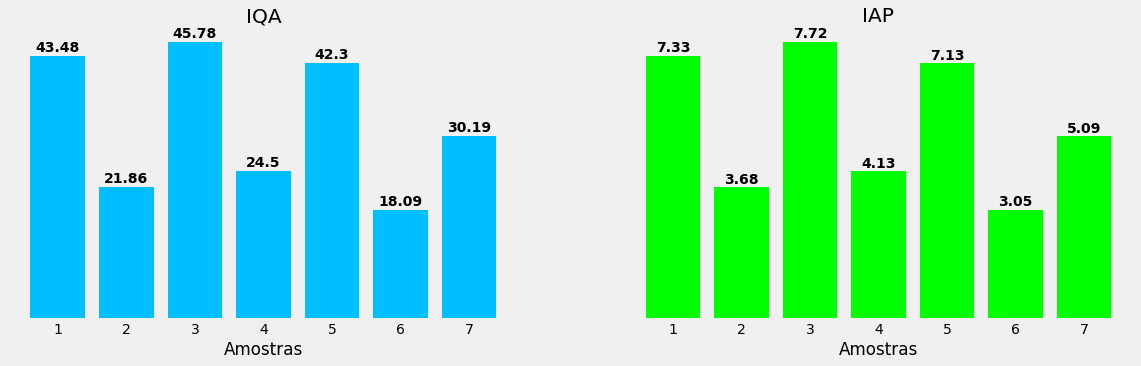

In [25]:
plt.style.use("fivethirtyeight")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,5))
ax1.bar(Dados.index, Dados['IQA'], color='#00BFFF', alpha=1, align='center')
ax2.bar(Dados.index, Dados['IAP'], color='#00FF00', alpha=1, align='center')
ax1.get_yaxis().set_visible(False)
ax2.get_yaxis().set_visible(False)
ax1.grid(False)
ax2.grid(False)

ax1.set(title="IQA", xlabel="Amostras", ylabel="IQA")
ax2.set(title="IAP", xlabel="Amostras", ylabel="IAP")

for i, v in enumerate(Dados['IQA'].round(2)):
            ax1.text(i  + 1, v + 0.7, str(v), color='black', ha='center', fontweight='bold', alpha=1)

for i, v in enumerate(Dados['IAP'].round(2)):
            ax2.text(i  + 1, v + 0.1, str(v), color='black', ha='center', fontweight='bold', alpha=1)

plt.show(fig)

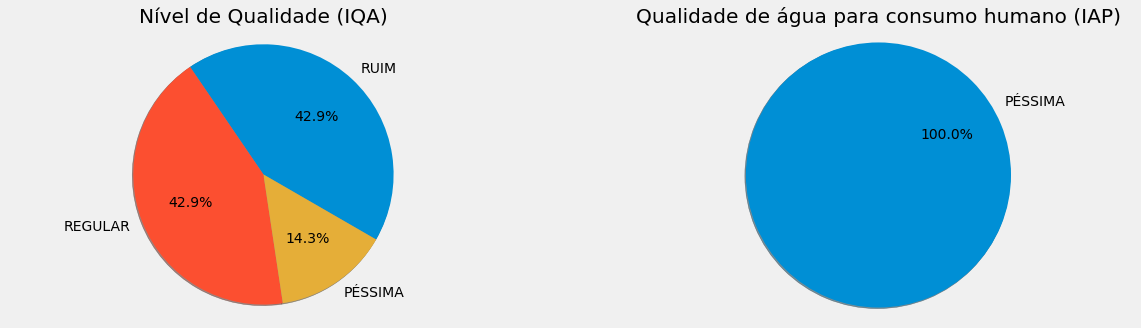

In [26]:
# IAP
fig, (ax2, ax1) = plt.subplots(1, 2, figsize=(18,5))
Categoria_IAP = (Dados['Categoria IAP'].value_counts()).reset_index()
Categoria_IAP.columns = ['Categoria', 'Qt_Amostras']
filter1 = list(Categoria_IAP['Qt_Amostras'].astype(str))
filter2 = list(Categoria_IAP['Categoria'])

Categoria_IQA = (Dados['Índice IQA'].value_counts()).reset_index()
Categoria_IQA.columns = ['Categoria', 'Qt_Amostras']
filter3 = list(Categoria_IQA['Qt_Amostras'])
filter4 = list(Categoria_IQA['Categoria'].astype(str))

ax2.pie(filter3, labels=filter4, autopct='%1.1f%%', shadow=True, startangle=330, pctdistance=0.6, radius=2.5)
ax1.pie(filter1, labels=filter2, autopct='%1.1f%%', shadow=True, startangle=210, pctdistance=0.6, radius=2.5)


ax1.axis('equal')
ax2.axis('equal')
ax2.set(title="Nível de Qualidade (IQA)")
ax1.set(title="Qualidade de água para consumo humano (IAP)")

plt.show()